# Tic-Tac-Toe

In [3]:
import random

def print_board(board):
    for row in board:
        print(" ".join(row))
    print()

def check_winner(board, player):
    for row in board:
        if all(cell == player for cell in row):
            return True
    
    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True
    
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True
    
    return False

def is_draw(board):
    return all(cell != '-' for row in board for cell in row)

def get_available_moves(board):
    return [(r, c) for r in range(3) for c in range(3) if board[r][c] == '-']

def minimax(board, depth, is_maximizing):
    if check_winner(board, '1'):
        return 10 - depth
    if check_winner(board, '0'):
        return depth - 10
    if is_draw(board):
        return 0
    
    if is_maximizing:
        best_score = -float('inf')
        for r, c in get_available_moves(board):
            board[r][c] = '1'
            score = minimax(board, depth + 1, False)
            board[r][c] = '-'
            best_score = max(best_score, score)
        return best_score
    else:
        best_score = float('inf')
        for r, c in get_available_moves(board):
            board[r][c] = '0'
            score = minimax(board, depth + 1, True)
            board[r][c] = '-'
            best_score = min(best_score, score)
        return best_score

def best_move(board):
    best_score = -float('inf')
    move = None
    for r, c in get_available_moves(board):
        board[r][c] = '1'
        score = minimax(board, 0, False)
        board[r][c] = '-'
        if score > best_score:
            best_score = score
            move = (r, c)
    return move

def play_game():
    board = [['-' for _ in range(3)] for _ in range(3)]
    human = '0'
    ai = '1'
    
    print("Tic Tac Toe - You play as '0', AI plays as '1'")
    print_board(board)
    
    for turn in range(9):
        if turn % 2 == 0:  # Human's turn
            while True:
                try:
                    row, col = map(int, input("Enter row and column (0-2) separated by space: ").split())
                    if board[row][col] == '-':
                        board[row][col] = human
                        break
                    else:
                        print("Cell already occupied! Try again.")
                except (ValueError, IndexError):
                    print("Invalid input! Enter row and column as two numbers (0-2).")
        else:  # AI's turn
            move = best_move(board)
            if move:
                board[move[0]][move[1]] = ai
            print("AI's move:")
            print_board(board)
        
        if check_winner(board, human):
            print("Congratulations! You win!")
            return
        elif check_winner(board, ai):
            print("AI wins! Better luck next time.")
            return
        elif is_draw(board):
            print("It's a draw!")
            return

if __name__ == "__main__":
    play_game()

Tic Tac Toe - You play as '0', AI plays as '1'
- - -
- - -
- - -

Enter row and column (0-2) separated by space: 0 0
AI's move:
0 - -
- 1 -
- - -

Enter row and column (0-2) separated by space: 1 1
Cell already occupied! Try again.
Enter row and column (0-2) separated by space: 1 0
AI's move:
0 - -
0 1 -
1 - -

Enter row and column (0-2) separated by space: 0 1
AI's move:
0 0 1
0 1 -
1 - -

AI wins! Better luck next time.


# 8-puzzle problem

In [10]:
import heapq
import numpy as np

def manhattan_distance(state, goal):
    distance = 0
    for num in range(1, 9):
        x1, y1 = np.where(state == num)
        x2, y2 = np.where(goal == num)
        distance += abs(x1[0] - x2[0]) + abs(y1[0] - y2[0])
    return distance

def get_neighbors(state):
    neighbors = []
    x, y = np.where(state == 0)
    x, y = x[0], y[0]
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    for dx, dy in moves:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < 3 and 0 <= new_y < 3:
            new_state = state.copy()
            new_state[x, y], new_state[new_x, new_y] = new_state[new_x, new_y], new_state[x, y]
            neighbors.append(new_state)
    
    return neighbors

def a_star(start, goal):
    start = np.array(start)
    goal = np.array(goal)
    
    open_list = []
    heapq.heappush(open_list, (0, start.tolist()))
    came_from = {}
    g_score = {tuple(map(tuple, start)): 0}
    f_score = {tuple(map(tuple, start)): manhattan_distance(start, goal)}
    
    while open_list:
        _, current = heapq.heappop(open_list)
        current = np.array(current)
        
        if np.array_equal(current, goal):
            path = []
            while tuple(map(tuple, current)) in came_from:
                path.append(current.tolist())
                current = np.array(came_from[tuple(map(tuple, current))])
            path.append(start.tolist())
            return path[::-1]
        
        for neighbor in get_neighbors(current):
            temp_g_score = g_score[tuple(map(tuple, current))] + 1
            neighbor_tuple = tuple(map(tuple, neighbor))
            
            if neighbor_tuple not in g_score or temp_g_score < g_score[neighbor_tuple]:
                came_from[neighbor_tuple] = current.tolist()
                g_score[neighbor_tuple] = temp_g_score
                f_score[neighbor_tuple] = temp_g_score + manhattan_distance(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor_tuple], neighbor.tolist()))
    
    return None

def print_path(path):
    if path:
        print("Solution path:")
        for step, state in enumerate(path):
            print(f"Step {step}:")
            for row in state:
                print(row)
            print()
    else:
        print("No solution found.")

if __name__ == "__main__":
    print("Enter the initial state (3x3 grid) row by row, using space-separated numbers (0 for empty space):")
    start_state = [list(map(int, input().split())) for _ in range(3)]
    
    print("Enter the goal state (3x3 grid) row by row:")
    goal_state = [list(map(int, input().split())) for _ in range(3)]
    
    path = a_star(start_state, goal_state)
    print_path(path)

Enter the initial state (3x3 grid) row by row, using space-separated numbers (0 for empty space):
1 2 3
0 4 6
7 5 8
Enter the goal state (3x3 grid) row by row:
1 2 3
4 5 6
7 8 0
Solution path:
Step 0:
[1, 2, 3]
[0, 4, 6]
[7, 5, 8]

Step 1:
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

Step 2:
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

Step 3:
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



# Sudoku puzzle

In [11]:
import numpy as np

def is_valid(board, row, col, num):
    if num in board[row] or num in board[:, col]:
        return False
    box_row, box_col = row // 2 * 2, col // 3 * 3
    if num in board[box_row:box_row+2, box_col:box_col+3]:
        return False
    return True

def find_empty_cell(board):
    for i in range(6):
        for j in range(6):
            if board[i, j] == 0:
                return i, j
    return None

def solve_sudoku(board):
    empty_cell = find_empty_cell(board)
    if not empty_cell:
        return True
    row, col = empty_cell
    
    for num in range(1, 7):
        if is_valid(board, row, col, num):
            board[row, col] = num
            if solve_sudoku(board):
                return True
            board[row, col] = 0
    return False

def print_board(board):
    for row in board:
        print(" ".join(map(str, row)))

if __name__ == "__main__":
    puzzle = np.array([
        [0, 0, 0, 4, 0, 6],
        [0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [4, 0, 0, 3, 0, 0]
    ])
    
    if solve_sudoku(puzzle):
        print("Solved Sudoku:")
        print_board(puzzle)
    else:
        print("No solution exists.")

Solved Sudoku:
1 2 3 4 5 6
5 4 6 1 2 3
2 3 1 5 6 4
6 5 4 2 3 1
3 1 2 6 4 5
4 6 5 3 1 2


In [12]:
import numpy as np
import math
import csv

class Node:
    def __init__(self, attribute=""):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    @staticmethod
    def read_data(filename):
        with open(filename, 'r') as csvfile:
            datareader = csv.reader(csvfile, delimiter=',')
            metadata = next(datareader)
            traindata = [row for row in datareader]
        return metadata, np.array(traindata)

    @staticmethod
    def subtables(data, col, delete=True):
        unique_values, counts = np.unique(data[:, col], return_counts=True)
        dict_ = {val: data[data[:, col] == val] for val in unique_values}
        if delete:
            for key in dict_:
                dict_[key] = np.delete(dict_[key], col, axis=1)
        return unique_values, dict_

    @staticmethod
    def entropy(S):
        unique_classes, counts = np.unique(S, return_counts=True)
        probabilities = counts / len(S)
        return -np.sum(probabilities * np.log2(probabilities)) if len(probabilities) > 1 else 0

    @staticmethod
    def gain_ratio(data, col):
        items, dict_ = Node.subtables(data, col, delete=False)
        total_size = len(data)
        entropies = np.array([len(subset) / total_size * Node.entropy(subset[:, -1]) for subset in dict_.values()])
        split_info = -np.sum((len(subset) / total_size) * np.log2(len(subset) / total_size) for subset in dict_.values() if len(subset) > 0)
        total_entropy = Node.entropy(data[:, -1]) - np.sum(entropies)
        return total_entropy / split_info if split_info != 0 else 0

    @staticmethod
    def create_node(data, metadata):
        if len(np.unique(data[:, -1])) == 1:
            node = Node()
            node.answer = data[0, -1]
            return node
        
        gains = np.array([Node.gain_ratio(data, col) for col in range(data.shape[1] - 1)])
        split_col = np.argmax(gains)
        node = Node(metadata[split_col])
        metadata = np.delete(metadata, split_col, 0)
        items, dict_ = Node.subtables(data, split_col, delete=True)
        
        for val in items:
            child = Node.create_node(dict_[val], metadata)
            node.children.append((val, child))
        return node

    @staticmethod
    def print_tree(node, level=0):
        indent = "  " * level
        if node.answer:
            print(f"{indent}Answer: {node.answer}")
        else:
            print(f"{indent}{node.attribute}")
            for value, child in node.children:
                print(f"{indent}  {value}")
                Node.print_tree(child, level + 2)

if __name__ == "__main__":
    metadata, traindata = Node.read_data("PlayTennis.csv")
    tree = Node.create_node(traindata, metadata)
    Node.print_tree(tree)

Outlook
  Overcast
    Answer: Yes
  Rain
    Wind
      Strong
        Answer: No
      Weak
        Answer: Yes
  Sunny
    Humidity
      High
        Answer: No
      Normal
        Answer: Yes


C:\Users\uttam\AppData\Local\Temp\ipykernel_19524\598508449.py:39: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  split_info = -np.sum((len(subset) / total_size) * np.log2(len(subset) / total_size) for subset in dict_.values() if len(subset) > 0)


#  simple linear regression and multiple linear regression

Coefficients (m): [0.85714286]
Intercept (c): 1.5714285714285716
Mean Squared Error: 0.48979591836734737
R-squared: 0.857142857142857


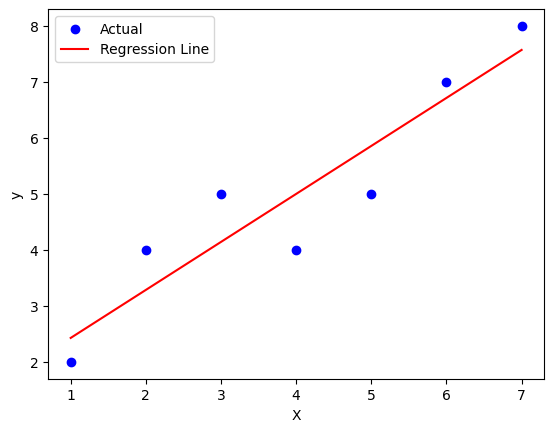

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample Data
X = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5, 7, 8])

# Model Training
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Print Results
print("Coefficients (m):", model.coef_)
print("Intercept (c):", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

# Plot
plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



Multiple Linear Regression:
Coefficients (m): [  250. 12500. 12500.]
Intercept (c): -287499.99999999907
Mean Squared Error: 16249999999.999882
R-squared: -5.499999999999953


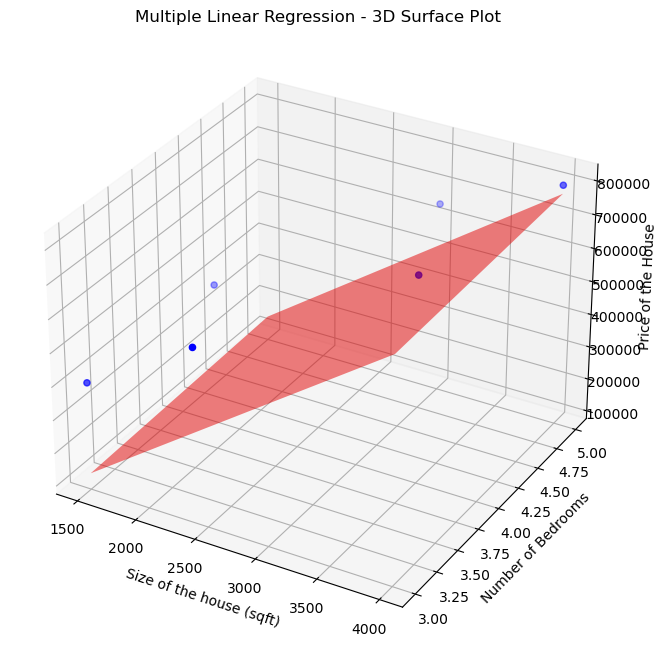

In [25]:
#Program 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Multiple Linear Regression with 3D Plot
def multiple_linear_regression():
    # Dataset: Features (X) and Target variable (y)
    X = np.array([
        [1500, 3, 10],  # 1500 sqft, 3 bedrooms, 10 years old
        [1800, 4, 15],
        [2400, 3, 20],
        [3000, 5, 10],
        [3500, 4, 5],
        [4000, 5, 2]
    ])  # Independent variables (features)

    y = np.array([400000, 500000, 600000, 650000, 700000, 800000])  # Target variable (price of the house)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Output results
    print("\nMultiple Linear Regression:")
    print("Coefficients (m):", model.coef_)
    print("Intercept (c):", model.intercept_)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Visualizing the regression surface (only for two features)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Select the first two features for visualization
    X1 = X[:, 0]  # Feature 1: Size of the house (sqft)
    X2 = X[:, 1]  # Feature 2: Number of bedrooms
    X1_test, X2_test = np.meshgrid(np.linspace(X1.min(), X1.max(), 30),
                                  np.linspace(X2.min(), X2.max(), 30))

    # Predicted values for the grid points
    Z_pred = model.predict(np.c_[X1_test.ravel(), X2_test.ravel(), np.zeros_like(X1_test.ravel())])
    Z_pred = Z_pred.reshape(X1_test.shape)

    # Scatter plot of the data points
    ax.scatter(X1, X2, y, color='blue', label='Data Points')

    # Plot the regression plane
    ax.plot_surface(X1_test, X2_test, Z_pred, color='red', alpha=0.5, rstride=100, cstride=100)

    ax.set_xlabel('Size of the house (sqft)')
    ax.set_ylabel('Number of Bedrooms')
    ax.set_zlabel('Price of the House')
    ax.set_title('Multiple Linear Regression - 3D Surface Plot')

    plt.show()

# Main function to call the regression
def main():
    multiple_linear_regression()

# Run the program
if __name__ == "__main__":
    main()



# Naïve Bayes Classifier

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset (replace with actual filename)
df = pd.read_csv("dataset.csv")

# Encode categorical features
label_encoders = {}
for col in df.columns[:-1]:  # Exclude target column
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# Split data
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict & Compute Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Results
print("Gaussian Naive Bayes Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)


Gaussian Naive Bayes Classifier:
Accuracy: 0.60
Confusion Matrix:
 [[1 1]
 [1 2]]


# K-Nearest Neighbors (KNN) Classifier for Iris Dataset

K-Nearest Neighbors (k=5) Classifier:
Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


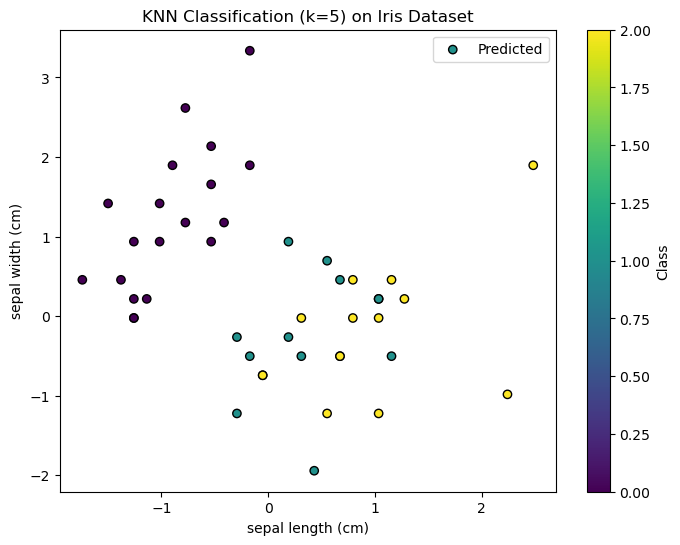

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict & Compute Accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Results
print(f"K-Nearest Neighbors (k={k}) Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)

# Visualization of first two features
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', marker='o', label="Predicted")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Classification (k={k}) on Iris Dataset")
plt.colorbar(label="Class")
plt.legend()
plt.show()


K-Means Clustering:
Confusion Matrix (true labels vs predicted clusters):
 [[ 0 50  0]
 [47  3  0]
 [50  0  0]]


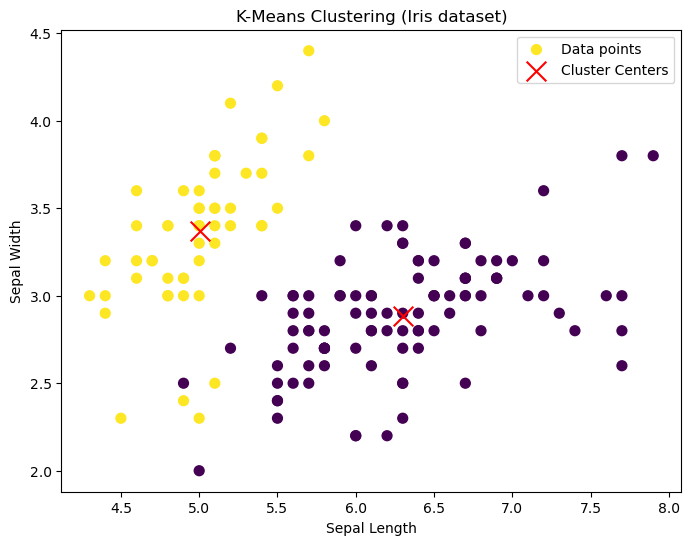

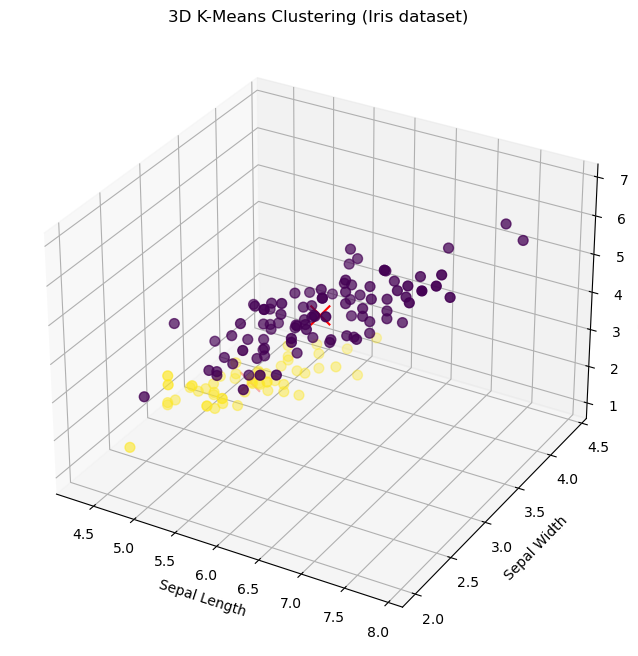

In [38]:
#Program 9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to implement K-Means Clustering
def kmeans_clustering():
    # Load Iris dataset
    iris = load_iris()
    X = iris.data  # Features
    y = iris.target  # Target labels (species)

    # Apply KMeans clustering with k=3 (since there are 3 species in Iris dataset)
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)

    # Cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Predict clusters for each data point
    y_pred = kmeans.predict(X)

    # Evaluate the model (Accuracy and Confusion Matrix)
    print("K-Means Clustering:")

    # Since the clusters are not labeled, we will compute the confusion matrix
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix (true labels vs predicted clusters):\n", cm)

    # Plot the cluster centers
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', label='Data points', s=50)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers', s=200)
    plt.title('K-Means Clustering (Iris dataset)')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.show()

    # Plot a 3D representation of the clustering
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, cmap='viridis', s=50)
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='x', s=200)
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel('Petal Length')
    ax.set_title('3D K-Means Clustering (Iris dataset)')
    plt.show()

# Main function to run the KMeans clustering
def main():
    kmeans_clustering()

# Run the program
if __name__ == "__main__":
    main()